In [1]:
from pylab import *

%run ~/pizza/src/pizza.py

Pizza.py (9 Oct 2015), a toolkit written in Python
type ? for help, CTRL-D to quit
Loading tools ...
image tool did not load:
  No module named Pmw
animate tool did not load:
  No module named ImageTk
gl tool did not load:
  No module named OpenGL.Tk


In [2]:
%%capture
%%time

data = dump("dump.lammpstrj")

In [3]:
r_center = array([16.8, 16.8])
t = data.time(); nt = size(t); tmp_time, box, atoms, bonds, tris, lines = data.viz(0)

In [4]:
import seaborn as sns
sns.set()
sns.set_context("paper", rc={"axes.labelsize":20})
rcParams['figure.figsize'] = (12, 8)

In [5]:
from numba import njit

In [6]:
%%time 

@njit
def fill_and_avg(v, bin_idx, particle_idx, nbins):
    avg_v = zeros(nbins)
    counter = zeros(nbins)
    
    for i in range(bin_idx.shape[0]):
        avg_v[bin_idx[i]] += v[i]
        counter[bin_idx[i]] += 1
    
    for j in range(avg_v.shape[0]):
        if counter[j] > 0:
            avg_v[j] /= counter[j]
    
    return avg_v, counter


nbins = 50

bin_r = linspace(0, 5.87, nbins)
avg_vx = zeros(nbins)
times_with_value = zeros(nbins)
particle_idx = zeros(len(atoms))

_, R = histogram(bin_r, bins=nbins)
R = R[:-1]

for ti in t:
    y = array(data.vecs(ti, "y"))
    z = array(data.vecs(ti, "z"))
    vx = array(data.vecs(ti, "vx"))

    positions = r_center -  column_stack((y, z))
    r = sqrt(positions[:, 0]**2 + positions[:, 1]**2)

    bin_idx = digitize(r, R) - 1
    tmp_vx, counter = fill_and_avg(vx, bin_idx, particle_idx, nbins)
    avg_vx += tmp_vx
    times_with_value += (counter > 0)
    
avg_vx /= times_with_value

CPU times: user 59 s, sys: 532 ms, total: 59.5 s
Wall time: 59.6 s


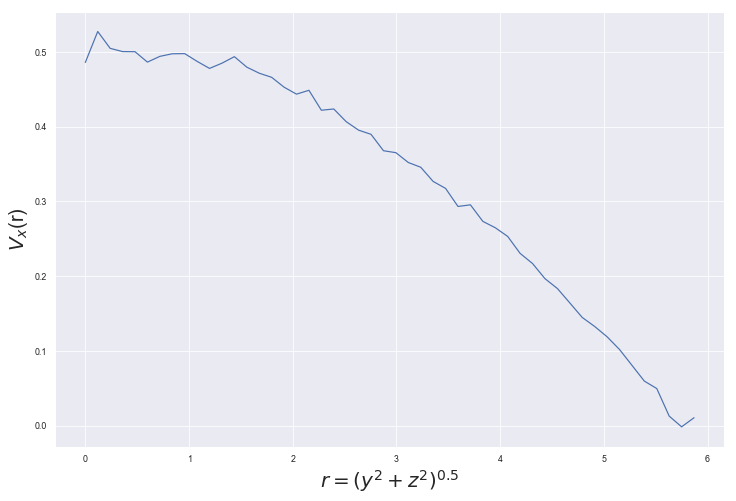

In [7]:
p = sns.lineplot(bin_r, avg_vx)
p.set_xlabel('$r=(y^2+z^2)^{0.5}$')
p.set_ylabel('$V_x$(r)')
#ylim(0 , 0.8)
#xlim(0 , 6)
show()

In [8]:
shape(bin_r)
#shape(avg_vx)
mu = (0.1 * (bin_r**2))/(4 * avg_vx)

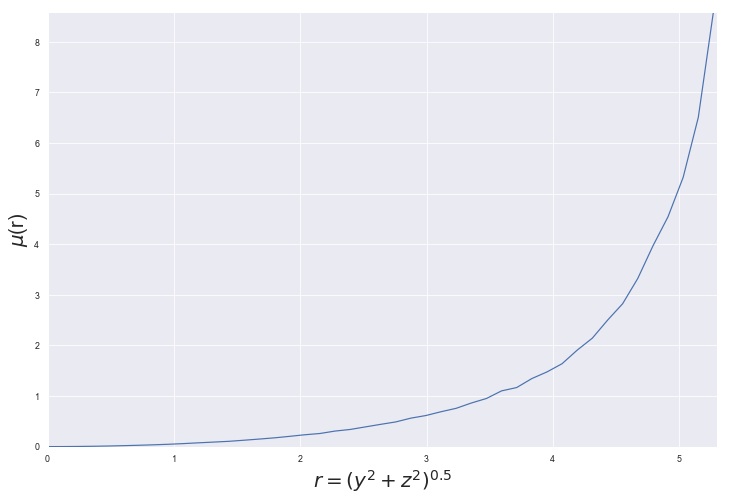

In [9]:
p = sns.lineplot(bin_r, mu)
p.set_xlabel('$r=(y^2+z^2)^{0.5}$', fontsize=20)
p.set_ylabel('$\mu$(r)', fontsize=20)
ylim(0, max(mu[bin_r < 5.30]))
xlim(0 , 5.30)
show()

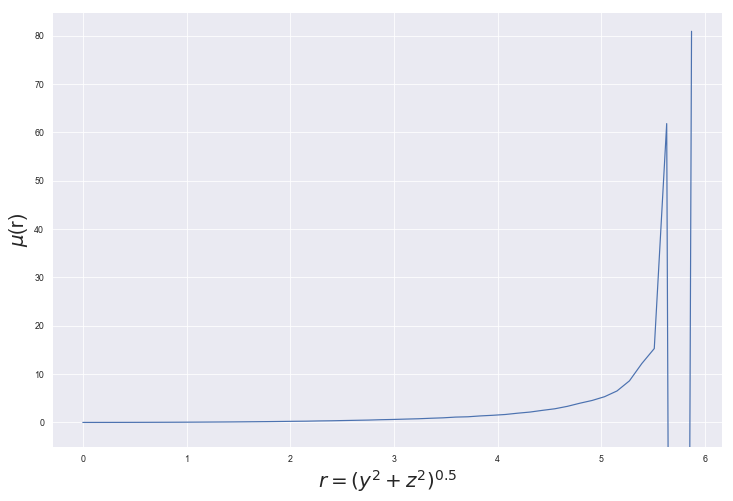

In [17]:
p = sns.lineplot(bin_r, mu)
p.set_xlabel('$r=(y^2+z^2)^{0.5}$', fontsize=20)
p.set_ylabel('$\mu$(r)', fontsize=20)
ylim(-5, max(mu)*1.05)
show()

In [20]:
mean_vx = zeros(len(t))

for i, ti in enumerate(t):
    vx = array(data.vecs(ti, "vx"))
    mean_vx[i] = vx.mean()

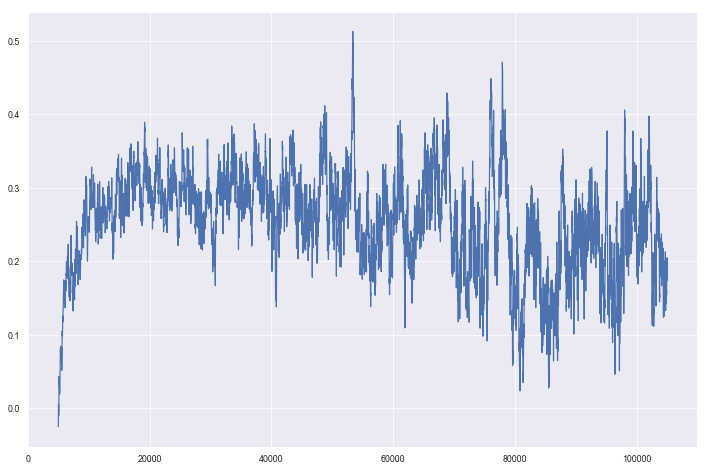

In [21]:
sns.lineplot(t, mean_vx)
show()